# Image Segmentation

This is used to reduce the number of pixels in an image. The pixels are grouped
to meaningful regions based upon hue. This can lead to computational
efficiencies when passing to ML algorithms. These regions are then referred to
as superpixels.

Below, we use Simple Linear Iterative Clustering (SLIC).

In [1]:
from skimage.segmentation import slic, mark_boundaries # plotting superpixels
from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import find_contours
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

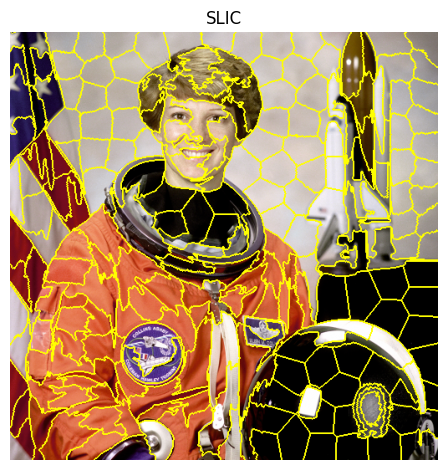

In [2]:
astro = data.astronaut()
segments_slic = slic(astro, n_segments=300,  start_label=1)
plt.imshow(mark_boundaries(astro, segments_slic))
plt.title("SLIC")
plt.axis("off")
plt.tight_layout()
plt.show()

***

## Finding Contours

This only works with black and white images, and binarized are best. The
`level` parameter in `find_countours` takes a float between 0 and 1. the
smaller the level, the more detailed the contours it detects.

Text(0.5, 1.0, 'Binarized Bricks')

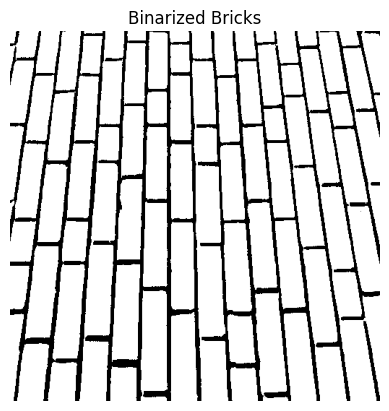

In [3]:
bricks = data.brick()
thresh = threshold_otsu(bricks)
binary_bricks = bricks > thresh
plt.imshow(binary_bricks, cmap="Greys")
plt.axis("off")
plt.title("Binarized Bricks")

In [4]:
brick_contours = find_contours(binary_bricks, level=.1)
for brick in brick_contours[0:5]:
    print(brick.shape)
# The different sized numpy arrays represent differing size brick contours,
# show the top 5 brick contours only. The returned object is a list of ndarrays

(26, 2)
(36, 2)
(147, 2)
(160, 2)
(219, 2)


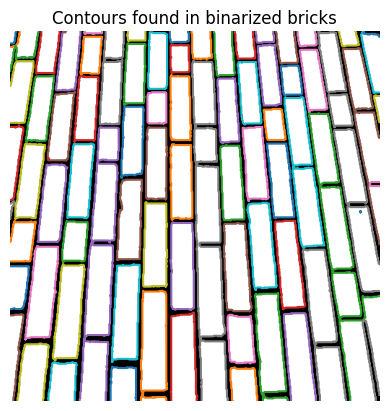

In [5]:
plt.figure()
for brick in brick_contours:
    plt.plot(brick[:,1], brick[:,0], linewidth=1.5)
plt.imshow(binary_bricks, cmap="gray_r")
plt.axis("off")
plt.title("Contours found in binarized bricks")
plt.show()

### Finding Contrours in Color Images

Remember to convert to grayscale first

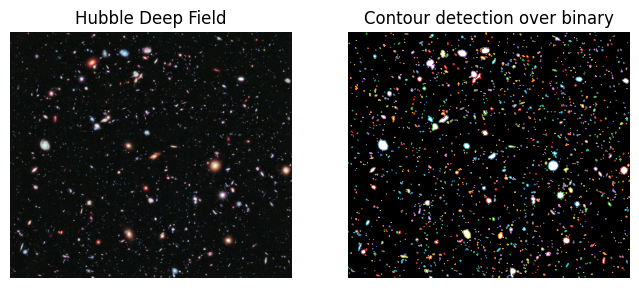

In [27]:
hubble = data.hubble_deep_field()
# grayscale
hubble_grey = rgb2gray(hubble)
thresh = threshold_otsu(hubble_grey)
hubble_binary = hubble_grey < thresh
hubble_contours = find_contours(hubble_binary, 0.8)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
ax1.imshow(hubble)
ax1.axis("off")
ax1.set_title("Hubble Deep Field")
ax2.imshow(hubble_binary, cmap="Greys")
for i in hubble_contours:
    ax2.plot(i[:,1],i[:,0], linewidth=0.5)
ax2.axis("off")
ax2.set_title("Contour detection over binary")
plt.show()